In [1]:
# Import Packages
import pandas as pd 
import numpy as np 
from scipy.io import loadmat 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Question 1

In [2]:
# Load the Dataset DataA.mat
mat_dataA = loadmat('Dataset/DataA.mat')
    

In [3]:
# DataA.mat
print("Dataset A: \n", mat_dataA)

Dataset A: 
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Oct 21 15:46:48 2014', '__version__': '1.0', '__globals__': [], 'fea': array([[1, 2, 1, ..., 2, 2, 1],
       [3, 3, 4, ..., 1, 3, 4],
       [4, 1, 4, ..., 2, 4, 4],
       ...,
       [3, 4, 4, ..., 3, 1, 2],
       [1, 4, 3, ..., 4, 3, 4],
       [4, 3, 1, ..., 2, 4, 3]], dtype=uint8), 'gnd': array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int16)}


In [4]:
# Get the Features from the matrix 
mat_features_datA = mat_dataA['fea']

In [5]:
# Get the Labels from the Matrix 
mat_label_dataA = mat_dataA['gnd']

In [6]:
# Convert the Feature Matrix data into Pandas Dataframe
df_features_dataA = pd.DataFrame(mat_features_datA)
print("Features from the Dataset: \n", df_features_dataA)

Features from the Dataset: 
       0   1   2   3   4   5   6   7   8   9   ...  47  48  49  50  51  52  53  \
0      1   2   1   2   1   2   3   3   3   3  ...   4   3   2   3   4   2   2   
1      3   3   4   2   1   2   2   4   3   2  ...   3   1   4   3   4   4   4   
2      4   1   4   4   4   4   1   1   2   1  ...   1   1   2   1   1   4   2   
3      1   4   1   1   3   3   4   4   3   4  ...   2   1   3   3   4   1   3   
4      3   4   4   3   1   1   4   4   4   1  ...   4   3   1   3   2   1   4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
2195   3   3   3   4   2   2   3   3   4   4  ...   2   1   4   3   3   4   1   
2196   3   3   1   1   2   3   3   4   3   1  ...   4   2   1   3   1   2   3   
2197   3   4   4   3   3   3   1   2   4   3  ...   2   4   3   3   4   1   2   
2198   1   4   3   4   1   3   4   2   4   3  ...   4   2   4   2   2   2   4   
2199   4   3   1   2   2   3   3   3   3   4  ...   3   4   3   3   4   3   4   

In [7]:
# Statistical Description of the Dataset
print(df_features_dataA.describe())

0            1            2            3            4   \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean      2.493182     2.529545     2.506818     2.526818     2.547727   
std       1.103943     1.086542     1.098160     1.118780     1.081699   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       3.000000     3.000000     3.000000     3.000000     3.000000   
75%       3.000000     3.000000     3.000000     4.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

                5            6            7            8           9   ...  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.00000  ...   
mean      2.492727     2.550000     2.541364     2.553182     2.56500  ...   
std       1.099399     1.109818     1.103600     1.126751     1.10822  ...   
min       1.000000     1.000000     1

## Check For Missing Values in the Dataset  

In [8]:
# Number of Missing Values in the Dataset 
print("Total Number of Missing Values in the Dataset: ",df_features_dataA.isna().sum().sum())


Total Number of Missing Values in the Dataset:  0


#### There are no missing values in the dataset

In [9]:
# Convert the Labels to Dataframe and Check for Unique Values 
df_label_dataA = pd.DataFrame(mat_label_dataA)
print("Number of Unique Lables in the Dataset: ", df_label_dataA[0].unique())

Number of Unique Lables in the Dataset:  [ 1 -1]


#### There are two unique labels in the data set -1 and 1

## Question 1.1: - Z-Score Normalization

In [10]:
# Z-Score Normalization
ss = StandardScaler()
ss.fit(df_features_dataA)
z_standardized_dataA = ss.transform(df_features_dataA)

In [11]:
# Standardised Dataset 
print("Standardised DataA: \n",z_standardized_dataA)

Standardised DataA: 
 [[-1.35289759 -0.48747864 -1.37244139 ... -0.4584159  -0.41756618
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ... -1.37441497  0.49741947
   1.36965138]
 [ 1.36525282 -1.40803915  1.36002111 ... -0.4584159   1.41240513
   1.36965138]
 ...
 [ 0.45920268  1.35364239  1.36002111 ...  0.45758317 -1.33255183
  -0.47161537]
 [-1.35289759  1.35364239  0.44920027 ...  1.37358225  0.49741947
   1.36965138]
 [ 1.36525282  0.43308188 -1.37244139 ... -0.4584159   1.41240513
   0.44901801]]


In [12]:
# Convert Labels to numpy array
np_label_dataA = df_label_dataA.to_numpy()
print("converted array is :",np_label_dataA)

converted array is : [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


### Randomnly spliting the data 70% of samples for taining and other 30% for testing
### using hold-out scheme

In [13]:
# Split the Dataset using Train Test Split 
x_train_dataA, x_test_dataA, y_train_dataA, y_test_dataA = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size = 0.3, random_state = 42)

print(" \n Features for Train Dataset: \n", x_train_dataA)
print(" \n Labels for the Train Dataset: \n", y_train_dataA)


 Features for Train Dataset: 
 [[ 1.36525282 -0.48747864  0.44920027 ...  1.37358225  1.41240513
   1.36965138]
 [-0.44684745 -0.48747864 -1.37244139 ...  1.37358225 -1.33255183
   1.36965138]
 [-0.44684745  1.35364239 -1.37244139 ...  0.45758317 -1.33255183
   0.44901801]
 ...
 [ 1.36525282 -0.48747864 -0.46162056 ... -0.4584159  -0.41756618
   0.44901801]
 [ 0.45920268  0.43308188  0.44920027 ... -1.37441497  0.49741947
   0.44901801]
 [-0.44684745  1.35364239 -0.46162056 ... -1.37441497 -0.41756618
  -0.47161537]]
 
 Labels for the Train Dataset: 
 [ 1  1 -1 ... -1 -1  1]


#### The hold out method is kind of cross validation method where the dataset is split into training and test set. Later the model is trained on only traning set and then output values are predicted using the same model for the Test set. 

#### Advantages:
Easier to compute

#### Disadvantage:
1. Sometimes evaluation has higher variance
2. It depends on what datapoints are in test set and what in training set so it depends on split heavily.

## Question 1.2: 5-fold Cross Validation on Training set to select the Parameters k for k_NN from given set and plot

In [14]:
# Create a list for k from 1 to 31 
k_list=list(range(1,32,2))
print("Set of parameters for k value is: \n",k_list)

Set of parameters for k value is: 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]


In [15]:
# empty list to store accuracy
K_accuracy=[]

# looping through given values of k
for k in k_list:
    # 2. KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. cross_val_score for KNeighborsClassifier with k neighbours
    accuracy = cross_val_score(knn, x_train_dataA, y_train_dataA, cv=5, scoring = 'accuracy')
    print("For k: {0}, Accuracies: {1}".format(k, accuracy))
    #4. append mean of scores for k neighbours to k_accuracy list
    K_accuracy.append(accuracy.mean())

print("Mean of accuracy scores: \n", K_accuracy)


For k: 1, Accuracies: [0.69805195 0.69805195 0.69155844 0.72077922 0.72402597]
For k: 3, Accuracies: [0.7012987  0.73376623 0.70779221 0.73701299 0.71753247]
For k: 5, Accuracies: [0.72727273 0.73376623 0.75324675 0.72402597 0.71103896]
For k: 7, Accuracies: [0.73701299 0.74675325 0.73376623 0.73051948 0.7012987 ]
For k: 9, Accuracies: [0.74675325 0.75324675 0.73701299 0.72402597 0.69805195]
For k: 11, Accuracies: [0.75649351 0.76298701 0.71103896 0.73051948 0.69805195]
For k: 13, Accuracies: [0.73701299 0.77272727 0.71103896 0.74350649 0.71428571]
For k: 15, Accuracies: [0.72727273 0.75324675 0.73376623 0.75324675 0.72077922]
For k: 17, Accuracies: [0.72077922 0.75       0.72727273 0.76298701 0.71428571]
For k: 19, Accuracies: [0.72077922 0.73701299 0.72077922 0.75       0.70454545]
For k: 21, Accuracies: [0.71103896 0.75       0.70779221 0.75974026 0.69805195]
For k: 23, Accuracies: [0.68831169 0.75       0.71103896 0.76623377 0.71103896]
For k: 25, Accuracies: [0.69155844 0.75974026

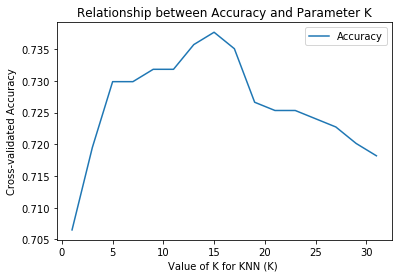

In [16]:
plt.plot(k_list, K_accuracy, label = 'Accuracy')
plt.xlabel('Value of K for KNN (K) ')
plt.ylabel('Cross-validated Accuracy')
plt.title('Relationship between Accuracy and Parameter K')
plt.legend(loc = 'best')
plt.show()

In [17]:
print('The best Calculation accuracy is :' , max(K_accuracy))


The best Calculation accuracy is : 0.7376623376623377


#### The Best Calculation accuracy of 0.7376623376623377 ie. 73.77% is best for value of K = 15

#### Hence the Best K in term of Classification Accuracy is 15. 

## Question 1.3: RBF Kernel best parameter selection in terms of classification accuracy

In [18]:
# Dicitionary of Parameters C and Gamma
c = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
gamma = [0.01, 0.05 , 0.1, 0.5, 1, 2, 5, 10]
param_dict = dict(C = c, gamma = gamma)
print("Dicitionary of Parameters C and Gamma: \n ",param_dict)

Dicitionary of Parameters C and Gamma: 
  {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}


In [19]:
# Data fitted with best parameters 
clf = svm.SVC(kernel = 'rbf')
search = GridSearchCV(clf, param_dict, cv = 5, scoring = 'accuracy').fit(x_train_dataA, y_train_dataA)

In [20]:
# Best Score for the Search 
print(" Best Score from Grid Search: ",search.best_score_)
    

Best Score from Grid Search:  0.9045454545454547


In [21]:
# Best Parameters from the Grid Search 
print("Best Parameters from the Grid Search: \n", search.best_params_)
           

Best Parameters from the Grid Search: 
 {'C': 10, 'gamma': 0.01}


#### The best parameters are : The best Soft Margin penality 'c' is 10 and gamma is 0.01

## Question 1.4:  

In [22]:
# classify the test set
#checking the test set
print(x_test_dataA)
print(y_test_dataA)

[[ 1.36525282 -0.48747864 -0.46162056 ... -1.37441497 -0.41756618
   0.44901801]
 [-1.35289759  1.35364239 -1.37244139 ...  1.37358225  0.49741947
  -1.39224875]
 [ 0.45920268  0.43308188  1.36002111 ...  1.37358225  1.41240513
   0.44901801]
 ...
 [ 1.36525282 -1.40803915  1.36002111 ...  1.37358225 -0.41756618
   1.36965138]
 [ 0.45920268  1.35364239  0.44920027 ...  1.37358225  1.41240513
   0.44901801]
 [ 1.36525282  1.35364239  0.44920027 ...  0.45758317  1.41240513
   0.44901801]]
[-1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1
 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1
  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1
 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1
  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 

In [23]:
# For K-NN using above parameters to classify the test set 
# k=3 gave best classification accuracy
Knn_model=KNeighborsClassifier(n_neighbors=3)
Knn_model.fit(x_train_dataA,y_train_dataA)

y_pred_KNN=Knn_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_KNN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_KNN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_KNN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_KNN))

Accuracy is : 0.7424242424242424
Precision is : 0.8370044052863436
Recall is : 0.5882352941176471
F1-Score is : 0.6909090909090909


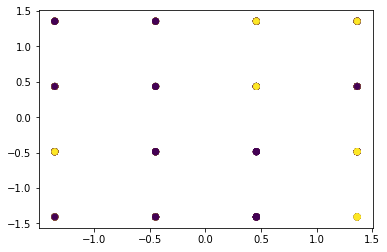

In [24]:
# Plot showing the classification with predicted values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_KNN)

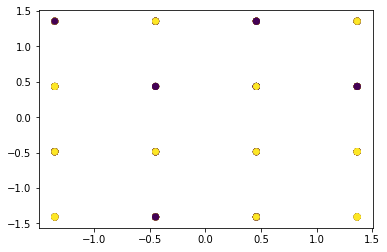

In [25]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [26]:
# For SVM using above parameters to classify the test set
SVN_model=SVC(C=5,gamma=0.01)
SVN_model.fit(x_train_dataA,y_train_dataA)

y_pred_SVN=SVN_model.predict(x_test_dataA)


# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_SVN))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_SVN))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_SVN))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_SVN))

Accuracy is : 0.9
Precision is : 0.9131832797427653
Recall is : 0.8792569659442725
F1-Score is : 0.8958990536277602


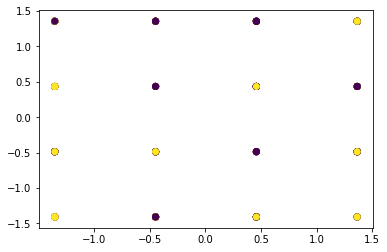

In [27]:
# Plot showing the classification with predicted valuesfor 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_SVN)

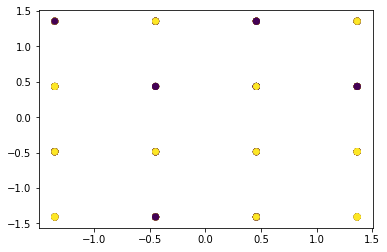

In [28]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [29]:
# Using default setups for Naive Bayes Classifier to classify test set

#using default Gaussian Naive Bayes

NB_model=GaussianNB()
NB_model.fit(x_train_dataA,y_train_dataA)

y_pred_NB=NB_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_NB))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_NB))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_NB))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_NB))

Accuracy is : 0.8818181818181818
Precision is : 0.8792569659442725
Recall is : 0.8792569659442725
F1-Score is : 0.8792569659442725


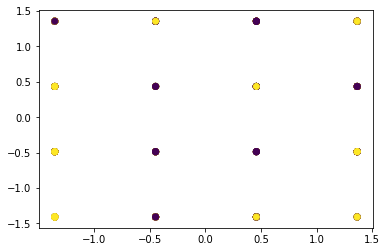

In [30]:
# Plot showing the classification with predicted valuesfor 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_NB)

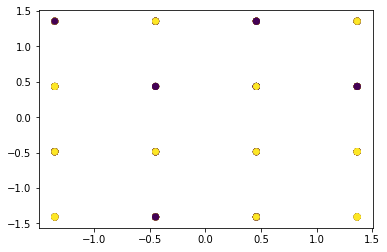

In [31]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [32]:
# Using default setups for Decision Trees to classify test set
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_dataA,y_train_dataA)

y_pred_DT=DT_model.predict(x_test_dataA)

# comparison between actual and predicted response
print("Accuracy is :",metrics.accuracy_score(y_test_dataA, y_pred_DT))
print("Precision is :",metrics.precision_score(y_test_dataA, y_pred_DT))
print("Recall is :",metrics.recall_score(y_test_dataA, y_pred_DT))
print("F1-Score is :",metrics.f1_score(y_test_dataA, y_pred_DT))

Accuracy is : 0.9348484848484848
Precision is : 0.9347826086956522
Recall is : 0.9318885448916409
F1-Score is : 0.9333333333333333


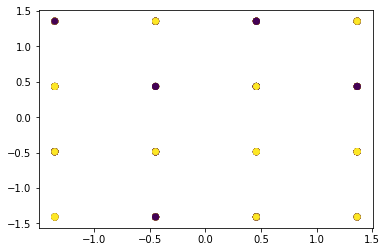

In [33]:
# Plot showing the classification with predicted values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_pred_DT)

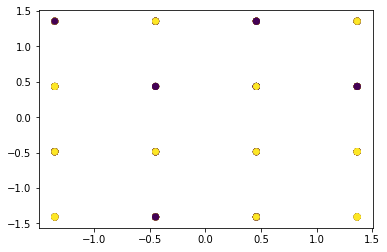

In [34]:
#Plot showing the classification with actual test y values for 1st two features
plt.scatter(x_test_dataA[:,0],x_test_dataA[:,1],c=y_test_dataA)

In [35]:
#Custom function to create float range

def frange(start,stop=None,step=None):
    
    if stop == None:
        stop=start+0.0
        start=0.0
        
    if step==None:
        step=1.0
        
    while True:
        if step>0 and start>=stop:
            break
        elif step<0 and start <=stop:
            break
        yield("%g" % start)
        start=start+step

iterations=frange(0.045,0.91,0.045)
test_iterations=[]
#Function tested here

for n in iterations:
    test_iterations.append(float(n))
    print("Test split values:",n)
    print("List of test iterations",test_iterations)
    f1=1-float(n)
    f2=f'{f1:.3f}'
    print("Train split values",f2)
    print("\n")

Test split values: 0.045
List of test iterations [0.045]
Train split values 0.955


Test split values: 0.09
List of test iterations [0.045, 0.09]
Train split values 0.910


Test split values: 0.135
List of test iterations [0.045, 0.09, 0.135]
Train split values 0.865


Test split values: 0.18
List of test iterations [0.045, 0.09, 0.135, 0.18]
Train split values 0.820


Test split values: 0.225
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225]
Train split values 0.775


Test split values: 0.27
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27]
Train split values 0.730


Test split values: 0.315
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315]
Train split values 0.685


Test split values: 0.36
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315, 0.36]
Train split values 0.640


Test split values: 0.405
List of test iterations [0.045, 0.09, 0.135, 0.18, 0.225, 0.27, 0.315, 0.36, 0.405]
Train split values 0.595


Test split value

In [36]:
# Repeating above steps 20 times by varying the split of training-test set 
# as in Step 1

#for KNN
Knn_model2=KNeighborsClassifier(n_neighbors=3)
#Classification based on KNN
KNN_accuracy_list=[]
KNN_precision_list=[]
KNN_recall_list=[]
KNN_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_KNN, x_test_dataA_KNN, y_train_dataA_KNN, y_test_dataA_KNN = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    Knn_model2.fit(x_train_dataA_KNN, y_train_dataA_KNN)
    #Test Dataset Prediction
    y_predict_KNN_list = Knn_model2.predict(x_test_dataA_KNN)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_KNN, y_predict_KNN_list)
    KNN_f1_list.append(f1score)

print("Acuracy list is :",KNN_accuracy_list)
print("\n")
print("Precision list is :",KNN_precision_list)
print("\n")
print("Recall list is:",KNN_recall_list)
print("\n")
print("F1-Score list is:",KNN_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_KNN=sum(KNN_accuracy_list)/len(KNN_accuracy_list)
variance_accuracy_list_KNN=sum([((x-mean_accuracy_list_KNN)**2) for x in KNN_accuracy_list])/len(KNN_accuracy_list)
sd_accuracy_list_KNN=variance_accuracy_list_KNN**0.5

print("mean for accuracy in case of KNN is",mean_accuracy_list_KNN)
print("\n")
print("Standard Deviation for accuracy in case of KNN is",sd_accuracy_list_KNN)

Acuracy list is : [0.7171717171717171, 0.7525252525252525, 0.7373737373737373, 0.7297979797979798, 0.7353535353535353, 0.7441077441077442, 0.733044733044733, 0.7462121212121212, 0.734304932735426, 0.7282828282828283, 0.721763085399449, 0.7306397306397306, 0.7233877233877234, 0.7164502164502164, 0.7117845117845117, 0.711489898989899, 0.7082590612002376, 0.704991587212563, 0.7076023391812866, 0.6732323232323232]


Precision list is : [0.9117647058823529, 0.9152542372881356, 0.8888888888888888, 0.8833333333333333, 0.8875, 0.9030612244897959, 0.8977777777777778, 0.9029850746268657, 0.8979591836734694, 0.9047619047619048, 0.8908045977011494, 0.8642857142857143, 0.851528384279476, 0.84, 0.8185117967332124, 0.8278260869565217, 0.8105939004815409, 0.7873563218390804, 0.7719298245614035, 0.7639077340569878]


Recall list is: [0.5535714285714286, 0.5510204081632653, 0.5405405405405406, 0.5326633165829145, 0.5568627450980392, 0.5709677419354838, 0.554945054945055, 0.580335731414868, 0.56050955414

In [37]:
#for SVM
SVM_model2=SVC(C=5,gamma=0.01)

#Classification based on SVM
SVM_accuracy_list=[]
SVM_precision_list=[]
SVM_recall_list=[]
SVM_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_SVM, x_test_dataA_SVM, y_train_dataA_SVM, y_test_dataA_SVM = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    SVM_model2.fit(x_train_dataA_SVM, y_train_dataA_SVM)
    #Test Dataset Prediction
    y_predict_SVM_list = SVM_model2.predict(x_test_dataA_SVM)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_SVM, y_predict_SVM_list)
    SVM_f1_list.append(f1score)

print("Acuracy list is :",SVM_accuracy_list)
print("\n")
print("Precision list is :",SVM_precision_list)
print("\n")
print("Recall list is:",SVM_recall_list)
print("\n")
print("F1-Score list is:",SVM_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_SVM=sum(SVM_accuracy_list)/len(SVM_accuracy_list)
variance_accuracy_list_SVM=sum([((x-mean_accuracy_list_SVM)**2) for x in SVM_accuracy_list])/len(SVM_accuracy_list)
sd_accuracy_list_SVM=variance_accuracy_list_SVM**0.5

print("mean for accuracy in case of SVM is",mean_accuracy_list_SVM)
print("\n")
print("Standard Deviation for accuracy in case of SVM is",sd_accuracy_list_SVM)

Acuracy list is : [0.8787878787878788, 0.8838383838383839, 0.8956228956228957, 0.9015151515151515, 0.8949494949494949, 0.8939393939393939, 0.8917748917748918, 0.9040404040404041, 0.8968609865470852, 0.896969696969697, 0.8943985307621671, 0.8838383838383839, 0.8904428904428905, 0.8737373737373737, 0.8693602693602693, 0.8693181818181818, 0.8686868686868687, 0.8614694335389792, 0.8617756512493354, 0.8151515151515152]


Precision list is : [0.9230769230769231, 0.9032258064516129, 0.903448275862069, 0.9040404040404041, 0.9011857707509882, 0.9075907590759076, 0.9188405797101449, 0.9338422391857506, 0.9258426966292135, 0.9288617886178862, 0.9197080291970803, 0.9066666666666666, 0.9099236641221374, 0.8864265927977839, 0.8754813863928113, 0.881851400730816, 0.8815331010452961, 0.8702290076335878, 0.8731958762886598, 0.8356713426853707]


Recall list is: [0.8571428571428571, 0.8571428571428571, 0.8851351351351351, 0.8994974874371859, 0.8941176470588236, 0.8870967741935484, 0.8708791208791209, 0.

In [38]:
# For Naive Bayes
#for NB
NB_model2=GaussianNB()

#Classification based on NB
NB_accuracy_list=[]
NB_precision_list=[]
NB_recall_list=[]
NB_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_NB, x_test_dataA_NB, y_train_dataA_NB, y_test_dataA_NB = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    NB_model2.fit(x_train_dataA_NB, y_train_dataA_NB)
    #Test Dataset Prediction
    y_predict_NB_list = NB_model2.predict(x_test_dataA_NB)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_NB, y_predict_NB_list)
    NB_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_NB, y_predict_NB_list)
    NB_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_NB, y_predict_NB_list)
    NB_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_NB, y_predict_NB_list)
    NB_f1_list.append(f1score)

print("Acuracy list is :",NB_accuracy_list)
print("\n")
print("Precision list is :",NB_precision_list)
print("\n")
print("Recall list is:",NB_recall_list)
print("\n")
print("F1-Score list is:",NB_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_NB=sum(NB_accuracy_list)/len(NB_accuracy_list)
variance_accuracy_list_NB=sum([((x-mean_accuracy_list_NB)**2) for x in NB_accuracy_list])/len(NB_accuracy_list)
sd_accuracy_list_NB=variance_accuracy_list_NB**0.5

print("mean for accuracy in case of NB is",mean_accuracy_list_NB)
print("\n")
print("Standard Deviation for accuracy in case of NB is",sd_accuracy_list_NB)


Acuracy list is : [0.8383838383838383, 0.8232323232323232, 0.8451178451178452, 0.8560606060606061, 0.8525252525252526, 0.8535353535353535, 0.8542568542568543, 0.8598484848484849, 0.8621076233183856, 0.8616161616161616, 0.8631772268135904, 0.8661616161616161, 0.8671328671328671, 0.8694083694083694, 0.8686868686868687, 0.860479797979798, 0.8597742127153892, 0.8491306786315199, 0.8633705475810739, 0.8636363636363636]


Precision list is : [0.9, 0.8247422680412371, 0.8541666666666666, 0.8622448979591837, 0.8669354838709677, 0.8704318936877077, 0.8662952646239555, 0.8695652173913043, 0.8702127659574468, 0.8671726755218216, 0.8672413793103448, 0.8677165354330708, 0.8668596237337193, 0.8612565445026178, 0.8509615384615384, 0.8471121177802945, 0.8504366812227074, 0.8308157099697885, 0.8452041785375118, 0.850091407678245]


Recall list is: [0.8035714285714286, 0.8163265306122449, 0.831081081081081, 0.8492462311557789, 0.8431372549019608, 0.8451612903225807, 0.8543956043956044, 0.863309352517985

In [39]:
#for DT
DT_model2 = DecisionTreeClassifier()

#Classification based on DT
DT_accuracy_list=[]
DT_precision_list=[]
DT_recall_list=[]
DT_f1_list=[]
#Iteration for Retraining
for i in test_iterations:
    #f1=1-float(i)
    #f2=f'{f1:.3f}'
    #Random Dataset Split
    x_train_dataA_DT, x_test_dataA_DT, y_train_dataA_DT, y_test_dataA_DT = train_test_split(z_standardized_dataA,np_label_dataA.ravel(),test_size =i, random_state = 40)
    #Training the Model
    DT_model2.fit(x_train_dataA_DT, y_train_dataA_DT)
    #Test Dataset Prediction
    y_predict_DT_list = DT_model2.predict(x_test_dataA_DT)
    #Classification Accuracy
    accuracy=metrics.accuracy_score(y_test_dataA_DT, y_predict_DT_list)
    DT_accuracy_list.append(accuracy)
    
    #Precision
    precision=metrics.precision_score(y_test_dataA_DT, y_predict_DT_list)
    DT_precision_list.append(precision)
                                    
    #Recall
    recall=metrics.recall_score(y_test_dataA_DT, y_predict_DT_list)
    DT_recall_list.append(recall)
    
    #F1-score
    f1score=metrics.f1_score(y_test_dataA_DT, y_predict_DT_list)
    DT_f1_list.append(f1score)

print("Acuracy list is :",DT_accuracy_list)
print("\n")
print("Precision list is :",DT_precision_list)
print("\n")
print("Recall is list :",DT_recall_list)
print("\n")
print("F1-Score is list :",DT_f1_list)
print("\n")

#Average and standard Deviation of Classification values

mean_accuracy_list_DT=sum(DT_accuracy_list)/len(DT_accuracy_list)
variance_accuracy_list_DT=sum([((x-mean_accuracy_list_DT)**2) for x in DT_accuracy_list])/len(DT_accuracy_list)
sd_accuracy_list_DT=variance_accuracy_list_DT**0.5

print("mean for accuracy in case of DT is",mean_accuracy_list_DT)
print("\n")
print("Standard Deviation for accuracy in case of DT is",sd_accuracy_list_DT)

Acuracy list is : [0.898989898989899, 0.9343434343434344, 0.9461279461279462, 0.9318181818181818, 0.9131313131313131, 0.936026936026936, 0.924963924963925, 0.9242424242424242, 0.9136771300448431, 0.9212121212121213, 0.9146005509641874, 0.9132996632996633, 0.9106449106449106, 0.9163059163059163, 0.901010101010101, 0.9046717171717171, 0.8983957219251337, 0.9209197980931015, 0.9011164274322169, 0.9232323232323232]


Precision list is : [0.896551724137931, 0.9207920792079208, 0.9459459459459459, 0.9479166666666666, 0.9140625, 0.9444444444444444, 0.940677966101695, 0.9429280397022333, 0.9209401709401709, 0.9255725190839694, 0.9213286713286714, 0.9118110236220472, 0.9258698940998488, 0.9388335704125178, 0.9202127659574468, 0.9231722428748451, 0.9253910950661853, 0.945516458569807, 0.9038461538461539, 0.9537987679671458]


Recall is list : [0.9285714285714286, 0.9489795918367347, 0.9459459459459459, 0.914572864321608, 0.9176470588235294, 0.932258064516129, 0.9148351648351648, 0.91127098321342

# 5. Comment on obtained results